In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer, PorterStemmer

In [ ]:
import pandas as pd
dataset = pd.read_csv('D:/ann jo/Msc assignment/nlp/COLLEGE REVIEW SURVEY.csv')
dataset.head()


,Timestamp,Name,Review,Rating,sentiment
0,2021/04/05 4:19:09 PM GMT+5:30,Shifa Ussudoor,Interactive atmosphere,4,2
1,2021/04/05 4:23:42 PM GMT+5:30,J.GLARY AMALA MONIKA,Very Good college\nExcellent atmosphere,5,3
2,2021/04/05 4:25:53 PM GMT+5:30,Sebin James,The college infrastructure is amazing. But tea...,3,2
3,2021/04/05 4:29:34 PM GMT+5:30,U.DURGA,It is one of the best college in chennai.,5,3
4,2021/04/05 4:34:10 PM GMT+5:30,Jeffry James H,"Good atmosphere, average teaching",5,3


In [ ]:
review=dataset.iloc[:, 2]

In [ ]:
review=review.astype(str)
review[2]

'The college infrastructure is amazing. But teaching needs improvement. The students are wonderful. '

In [ ]:
#lower case
review=review.str.lower()
review[2]

'the college infrastructure is amazing. but teaching needs improvement. the students are wonderful. '

In [ ]:
#stop puncuation mark
review=review.str.replace('[^\w\s]','')
review[2]

'the college infrastructure is amazing but teaching needs improvement the students are wonderful '

In [ ]:
#stopwords
stop = stopwords.words('english')
review = review.apply(lambda x: " ".join(x for x in x.split() if x not in stop))
review[2]

'college infrastructure amazing teaching needs improvement students wonderful'

In [ ]:
#stemming
st = PorterStemmer()
review = review.apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
review[2]

'colleg infrastructur amaz teach need improv student wonder'

In [ ]:
!pip install textblob

In [ ]:
## Sentiment score
## Define a function which can be applied to calculate the score for the whole dataset
from textblob import TextBlob
def senti(x):
    return TextBlob(x).sentiment  
 
dataset['senti_score'] = review.apply(senti)
 
dataset.senti_score

0                                    (0.0, 0.0)
1                     (0.7, 0.6000000000000001)
2                                    (0.0, 0.0)
3                                    (1.0, 0.3)
4                     (0.7, 0.6000000000000001)
5                                    (0.0, 0.0)
6                                    (0.0, 0.0)
7                     (0.7, 0.6000000000000001)
8                     (0.7, 0.6000000000000001)
9                                   (0.55, 0.8)
10    (-0.6999999999999998, 0.6666666666666666)
11                                   (0.0, 0.0)
12                    (0.7, 0.6000000000000001)
13                    (0.7, 0.6000000000000001)
14                                   (0.0, 0.0)
15                                   (0.5, 0.5)
16                    (0.7, 0.6000000000000001)
17                                   (0.0, 0.0)
18                                   (0.0, 0.0)
19                                   (1.0, 0.3)
20                                   (0.

In [ ]:
from textblob import TextBlob
statement = "Interactive atmosphere"
sentiment1 = TextBlob(statement).sentiment
sentiment1

Sentiment(polarity=0.0, subjectivity=0.0)

In [ ]:

statement = "Interactive atmosphere"
sentiment1 = TextBlob(statement).sentiment

In [ ]:
TextBlob(review[2]).words

WordList(['colleg', 'infrastructur', 'amaz', 'teach', 'need', 'improv', 'student', 'wonder'])

In [ ]:
!pip install wordcloud

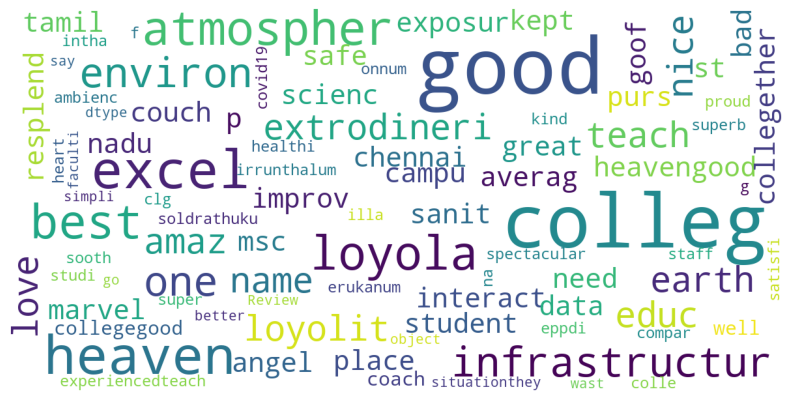

In [ ]:
#make wordcoud

from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)
def show_wordcloud(col, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=40, 
        scale=3,
        random_state=1
    ).generate(str(col))

    fig = plt.figure(1, figsize=(14, 14))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()


if __name__ == '__main__':

    show_wordcloud(review)

In [ ]:
review

0                                    interact atmospher
1                           good colleg excel atmospher
2     colleg infrastructur amaz teach need improv st...
3                               one best colleg chennai
4                           good atmospher averag teach
5                                                marvel
6                                                heaven
7                                                  good
8                                                  good
9       nice couch love environ colleg kept place sanit
10                                                  bad
11                                     heavengood campu
12                                                 good
13                                                 good
14                                         resplend one
15    purs msc data scienc loyola collegether safe p...
16                                                 good
17                                              

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 49):
  reviews = re.sub('[^a-zA-Z]', ' ', review[i])
  reviews = reviews.lower()
  reviews = reviews.split()
  ps = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  reviews = [ps.stem(word) for word in reviews if not word in set(all_stopwords)]
  reviews = ' '.join(reviews)
  corpus.append(reviews)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ELCOT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
  
# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500) 

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray() 
  
# y contains answers if review
# is positive or negative
y = dataset.iloc[:, -1].values

In [ ]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split

# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=0)


In [ ]:
# Fitting Random Forest Classification
# to the Training set
import numpy as np
from sklearn.ensemble import RandomForestClassifier
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))
print(accuracy_score(y_test,y_pred_rf))

[[2 4]
 [2 5]]
              precision    recall  f1-score   support

           2       0.50      0.33      0.40         6
           3       0.56      0.71      0.63         7

    accuracy                           0.54        13
   macro avg       0.53      0.52      0.51        13
weighted avg       0.53      0.54      0.52        13

0.5384615384615384


In [ ]:
#Clasiification
# Fitting Naive Bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_pred_NB = NB_classifier.predict(X_test)
#Confusion Matrices
cm_NB = confusion_matrix(y_test, y_pred_NB)
cm_NB

array([[5, 1],
       [2, 5]], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_NB))

              precision    recall  f1-score   support

           2       0.71      0.83      0.77         6
           3       0.83      0.71      0.77         7

    accuracy                           0.77        13
   macro avg       0.77      0.77      0.77        13
weighted avg       0.78      0.77      0.77        13



In [ ]:
#svc
#Support Vector
from sklearn.svm import SVC
SVC_classifier = SVC(kernel = 'rbf')
SVC_classifier.fit(X_train, y_train)
y_pred_SVC = SVC_classifier.predict(X_test)

In [ ]:
cm_SVC = confusion_matrix(y_test, y_pred_SVC)
cm_SVC

array([[3, 3],
       [2, 5]], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred_SVC))

              precision    recall  f1-score   support

           2       0.60      0.50      0.55         6
           3       0.62      0.71      0.67         7

    accuracy                           0.62        13
   macro avg       0.61      0.61      0.61        13
weighted avg       0.61      0.62      0.61        13

